## Name: Aman P - Final ones 9,10,11


## Object detection using Transfer Learning of CNN architectures for the given (image dataset) using the below steps:
    a.Load in a pre-trained CNN model trained on a large dataset
    b.Freeze parameters (weights) in model's lower convolutional layers
    c.Add custom classifier with several layers of trainable parameters to model
    d.Train classifier layers on training data available for task
    e.Fine-tune hyper parameters and unfreeze more layers as needed 

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import UpSampling2D,Dense,Input,Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
import pandas as pd
# Load the CIFAR-10 dataset
# Load CIFAR-10 data from CSV files
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Extract features and labels from the data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values


# Reshape the images to the expected input shape
X_train = X_train.reshape(-1, 32,32,3)
X_test = X_test.reshape(-1,32,32,3)


In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
base_model = InceptionV3(include_top=False,weights='imagenet', 
                         input_shape=(128, 128, 3),pooling='avg')

for layer in base_model.layers: 
   layer.trainable = False

2023-11-16 10:36:58.180920: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-16 10:36:58.180972: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-16 10:36:58.180985: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-16 10:36:58.181180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 10:36:58.181198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
inputlayer = Input(shape=(32, 32, 3))
model = Sequential([
    inputlayer,
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    base_model,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')   
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 64, 64, 3)         0         
 D)                                                              
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 128, 128, 3)       0         
 g2D)                                                            
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 flatten (Flatten)           (None, 64)                0

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [8]:
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1)

2023-11-16 10:37:03.049421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 133s 84ms/step - loss: 1.5308 - accuracy: 0.6217 - val_loss: 1.2716 - val_accuracy: 0.6621


In [9]:
prediction = model.predict(X_test)

313/313 [==============================] - 22s 68ms/step


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.49      0.61      1000
           1       0.58      0.93      0.71      1000
           2       0.73      0.62      0.67      1000
           3       0.73      0.41      0.52      1000
           4       0.46      0.81      0.59      1000
           5       0.70      0.68      0.69      1000
           6       0.81      0.62      0.70      1000
           7       0.76      0.70      0.73      1000
           8       0.61      0.86      0.72      1000
           9       0.91      0.50      0.64      1000

    accuracy                           0.66     10000
   macro avg       0.71      0.66      0.66     10000
weighted avg       0.71      0.66      0.66     10000



313/313 [==============================] - 21s 66ms/step


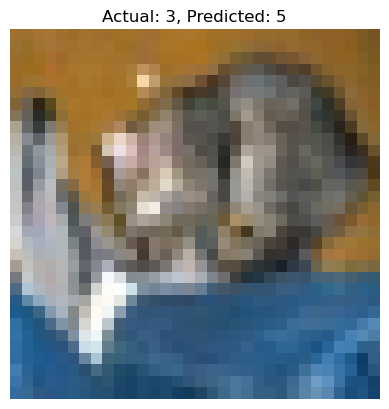

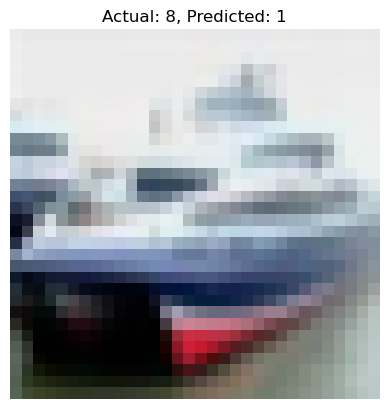

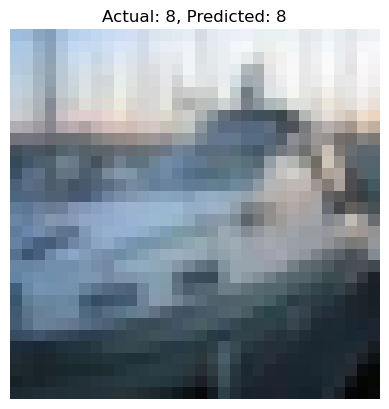

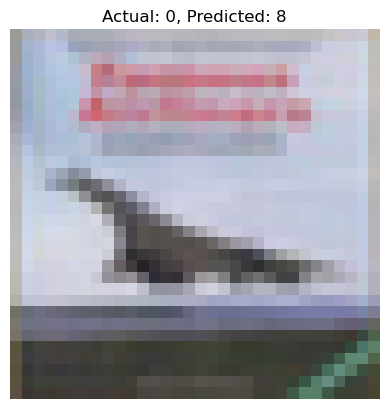

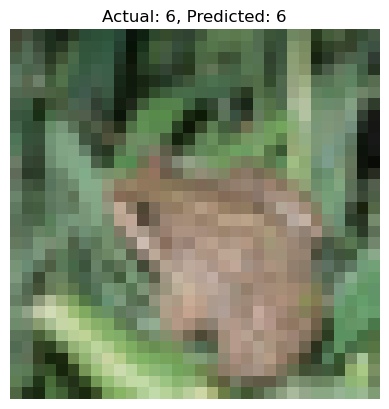

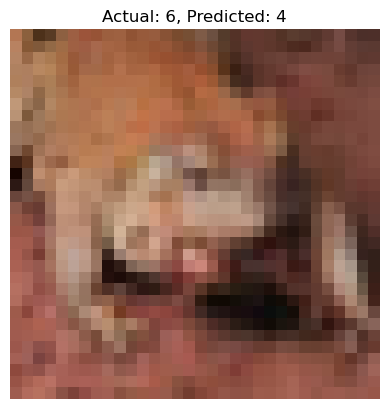

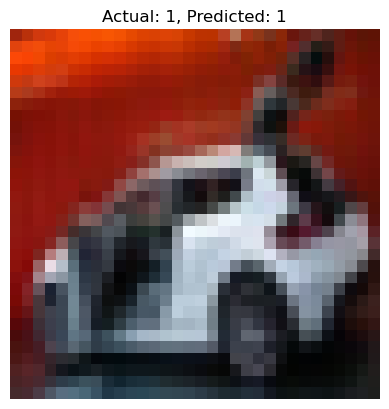

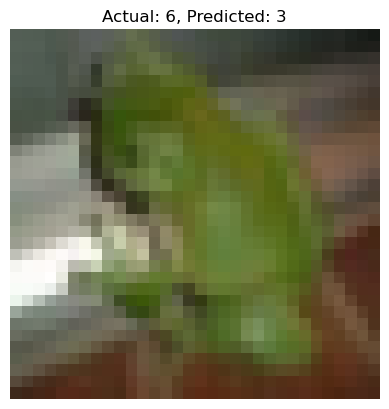

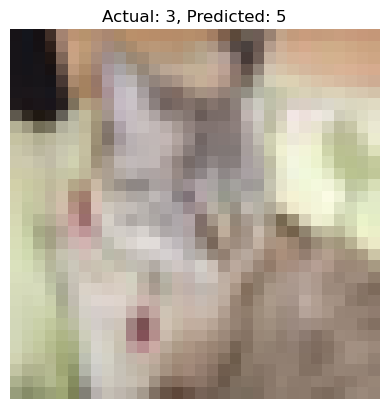

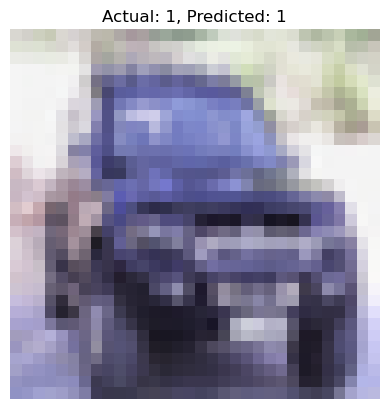

In [11]:
# Predictions
import numpy as np
import matplotlib.pyplot as plt
predictions = model.predict(X_test)

# Function to display actual and predicted labels with images
def display_actual_vs_predicted(n):
    actual_label = y_test[n]
    predicted_label = np.argmax(predictions[n])

    plt.imshow(X_test[n])
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.axis("off")
    plt.show()

# Display a few examples
for i in range(10):
    display_actual_vs_predicted(i)

In [12]:
for layer in base_model.layers: 
   layer.trainable = False
for layer in base_model.layers[len(base_model.layers)-2:]: 
   layer.trainable = True
inputlayer = Input(shape=(32, 32, 3))
model = Sequential([
    inputlayer,
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    base_model,
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')   
])
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2)

Epoch 1/2
1563/1563 [==============================] - 142s 89ms/step - loss: 1.9062 - accuracy: 0.5640 - val_loss: 1.2230 - val_accuracy: 0.6530
Epoch 2/2
 831/1563 [==============>...............] - ETA: 57s - loss: 1.1055 - accuracy: 0.6808

KeyboardInterrupt: 